In [100]:
# A machine learning library used for linear regression
from sklearn.linear_model import LinearRegression
# numpy and pandas will be used for data manipulation
import numpy as np
import pandas as pd
# matplotlib will be used for visually representing our data
import matplotlib.pyplot as plt

In [101]:
data = pd.read_csv(r"ML project//Brent Oil Futures Historical Data.csv")

In [102]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/07/2022,95.49,94.65,95.88,93.94,NaN,1.13%
1,10/06/2022,94.42,93.71,94.98,92.72,207.53K,1.12%
2,10/05/2022,93.37,91.89,93.96,90.76,296.20K,1.71%
3,10/04/2022,91.80,88.81,92.40,88.78,282.38K,3.31%
4,10/03/2022,88.86,86.35,89.82,86.35,270.69K,1.02%


<AxesSubplot:ylabel='Crude Oil Prices: Brent - India'>

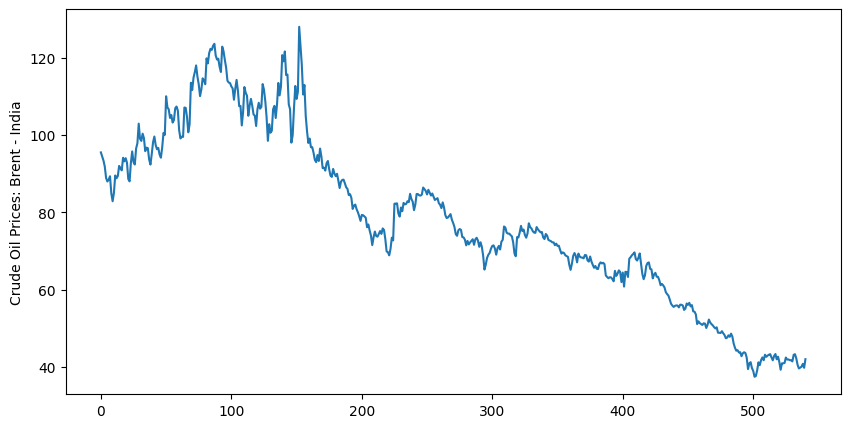

In [103]:
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices: Brent - India")
# Setting the size of our graph
data.Price.plot(figsize=(10,5))

In [104]:
# Dropping the NaN values
data = data.dropna()

# Initialising X and assigning the two feature variables
X = data[['Open','High','Low']]

# Getting the head of the data
X.head()

,Open,High,Low
1,93.71,94.98,92.72
2,91.89,93.96,90.76
3,88.81,92.40,88.78
4,86.35,89.82,86.35
5,88.53,89.80,87.69


In [105]:
# Setting-up the dependent variable
y = data['Price']

# Getting the head of the data
y.head()

1    94.42
2    93.37
3    91.80
4    88.86
5    87.96
Name: Price, dtype: float64

In [106]:
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [107]:
# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)

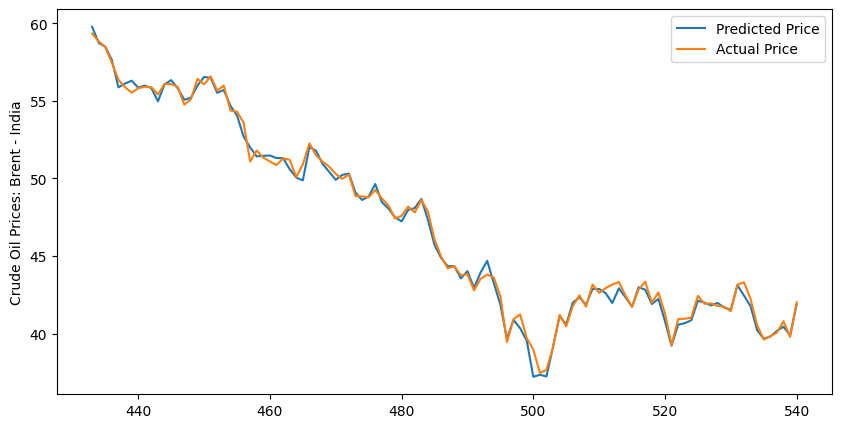

In [108]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - India")
plt.show()

In [109]:
# Computing the accuracy of our model
R_squared_score = model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.57% accuracy.


**working with larger dataset and improving accuracy of model**


In [110]:
data = pd.read_csv(r"Oil price.csv")

In [111]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/07/2022,97.92,94.71,98.58,93.94,269.40K,3.71%
1,10/06/2022,94.42,93.71,94.98,92.72,207.53K,1.12%
2,10/05/2022,93.37,91.89,93.96,90.76,296.20K,1.71%
3,10/04/2022,91.80,88.81,92.40,88.78,282.38K,3.31%
4,10/03/2022,88.86,86.35,89.82,86.35,270.69K,1.02%


In [112]:
# Dropping the NaN values
data = data.dropna()
# Initialising X and assigning the two feature variables
X = data[['Open','High','Low']]
# Getting the head of the data
X.head()

,Open,High,Low
0,94.71,98.58,93.94
1,93.71,94.98,92.72
2,91.89,93.96,90.76
3,88.81,92.40,88.78
4,86.35,89.82,86.35


In [113]:
y = data['Price']
# Getting the head of the data
y.head()

0    97.92
1    94.42
2    93.37
3    91.80
4    88.86
Name: Price, dtype: float64

In [114]:
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))
# Training dataset
X_train = X[:t]
y_train = y[:t]
# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [115]:
model = LinearRegression().fit(X_train,y_train)

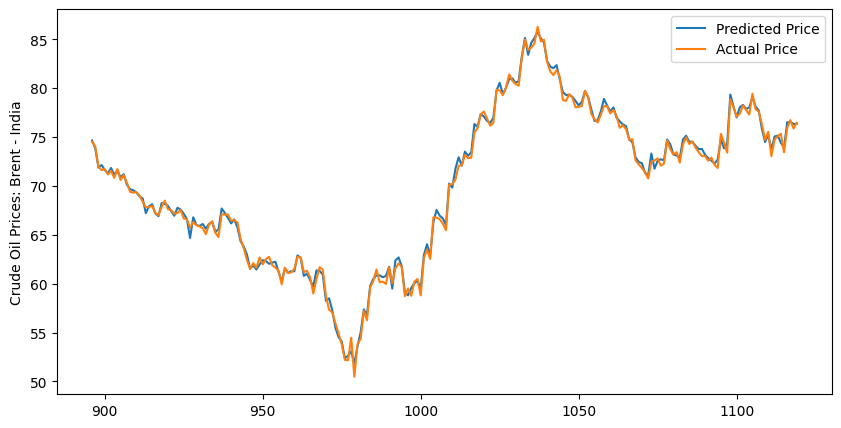

In [116]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - India")
plt.show()

In [117]:
# Computing the accuracy of our model
R_squared_score = model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 99.66% accuracy.


In [120]:
features = np.array([[92.0,95.0,90.0]])
pred = model.predict(features)
print(pred)

[92.65843373]


c:\Users\Sarthak Amble\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Tweaking the explanatory variables**

In [119]:
import pickle
pickle.dump(model, open('model.pkl','wb'))